In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
dataset = load_iris()
print(dataset.keys())
# print(dataset.data[:5])
# print(dataset.target)
# print(dataset.target_names)  #['setosa' 'versicolor' 'virginica']
# print(dataset.feature_names) #['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(dataset.frame)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# df_X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(data=dataset.data, columns=cols)
df["target"] = dataset.target
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# import pandas_profiling as pp
# pr_report=df.profile_report()
# df.profile_report()

In [7]:
df_y = df.iloc[:,-1]  #df["traget"]  
df_X = df.iloc[:,:-1]
print(len(df_y), df_X.shape)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=243, shuffle=True)
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

150 (150, 4)
(120, 4) (30, 4) 120 30


In [8]:
y_test.unique()

array([0, 1, 2])

* 다중분류용

In [9]:
def myscore(y_test,pred,proba, pr_curve=0, auc_curve=0):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1 = f1_score(y_test,pred, average='macro')
    auc = roc_auc_score(y_test, proba,  average="macro", multi_class="ovr")
    print("Accuracy:{:.6f}  precision:{:.6f}, recall:{:.6f}, f1:{:.6f}, auc:{:.6f}".format(accuracy, precision, recall, f1, auc))
    mtx = confusion_matrix(y_test, pred)
    print(mtx)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
proba = dt.predict_proba(X_test)
# print(pred[:5])
# print(proba[:5])
myscore(y_test,pred,proba)

Accuracy:0.966667  precision:0.952381, recall:0.972222, f1:0.959866, auc:0.979167
[[12  0  0]
 [ 0  6  0]
 [ 0  1 11]]


In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



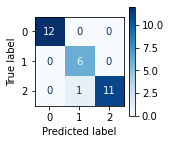

In [13]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(2, 2))
plot_confusion_matrix(dt, X_test, y_test, cmap="Blues",ax=ax)  
plt.show() 

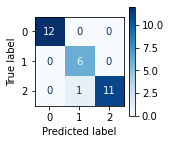

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels=dt.classes_)
fig, ax = plt.subplots(figsize=(2, 2))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues",ax=ax) 
plt.show()

In [15]:
pred

array([0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 0])

In [16]:
np.array(y_test).flatten()

array([0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 1, 2, 0])

In [17]:
a = pred
b = np.array(y_test).flatten()
diff = [idx for idx, (i, j) in enumerate(zip(a, b)) if i != j]
print(diff) 

[23]


In [18]:
X_test.iloc[17]

sepal_length    6.5
sepal_width     3.0
petal_length    5.2
petal_width     2.0
Name: 147, dtype: float64

(30, 5)


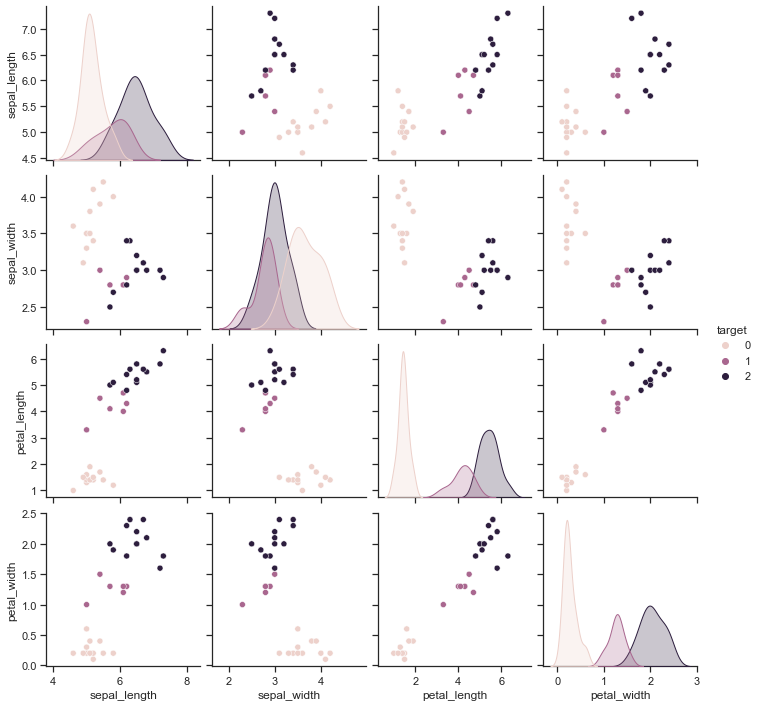

In [19]:
temp_test_df = X_test.copy()
temp_test_df["target"] = y_test
print(temp_test_df.shape)

import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(temp_test_df, hue="target")
plt.show()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')


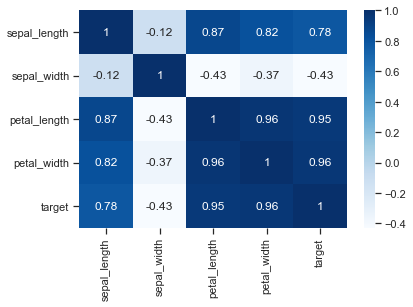

In [20]:
#------------ 결측X, 수치형 : 분석데이터
#분석 -------- 상관분석 : 피쳐관계
#---------------------: 일반피쳐:다중공선 타켓피쳐:상관도
print(df.columns)
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

## Pipeline = Scaler + PCA
* 정규화후 사용 : 최대분산(수치,스케일에 민감)

In [21]:
print(X_train.shape, X_test.shape, len(y_train), len(y_test))

(120, 4) (30, 4) 120 30


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

std_scaler = StandardScaler()
# X_train_scaler = std_scaler.fit_transform(X_train)  
# X_test_scaler  = std_scaler.transform(X_test) 

pca = PCA(n_components=2)
# res = pca.fit_transform(X_train_scaler)

pipeline = make_pipeline(std_scaler, pca)
pca_res = pipeline.fit_transform(df_X)
print(pca_res.shape)
print("주성분(PC) 2개가 전체 데이터를 얼마나 설명할수 있는가?\n", np.sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)


(150, 2)
주성분(PC) 2개가 전체 데이터를 얼마나 설명할수 있는가?
 0.9581320720000164 [0.72962445 0.22850762]


In [23]:
pca_df = pd.DataFrame(data=pca_res, columns=["pc1", "pc2"])
pca_df["target"] = df_y
pca_df.head()

,pc1,pc2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [24]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     150 non-null    float64
 1   pc2     150 non-null    float64
 2   target  150 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.1 KB


In [25]:
pca_df_y = pca_df.iloc[:,-1]  #df["traget"]  
pca_df_X = pca_df.iloc[:,:-1]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df_X, pca_df_y, test_size=0.2,  random_state=36, shuffle=True)
dt = DecisionTreeClassifier(random_state=36)
dt.fit(X_train_pca, y_train_pca)
pred = dt.predict(X_test_pca)
proba = dt.predict_proba(X_test_pca)
# print(pred[:5])
# print(proba[:5])
myscore(y_test_pca,pred,proba)

Accuracy:0.933333  precision:0.948718, recall:0.939394, f1:0.938889, auc:0.952153
[[ 8  0  0]
 [ 0  9  2]
 [ 0  0 11]]


## KFold

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


N_SPLIT = 5
# kfold = KFold(n_splits=N_SPLIT,  shuffle=False)
kfold = KFold(n_splits=N_SPLIT,  shuffle=True, random_state=36)
scores = []
for train_index, test_index in kfold.split(df):  #-----------KFold 
    print("TRAIN:", len(train_index) , "TEST:", len(test_index))
    X_train, X_test = df.iloc[train_index,:-1], df.iloc[test_index,:-1]
    y_train, y_test = df.iloc[train_index,-1], df.iloc[test_index,-1]
    print(y_train.value_counts())
    
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    df_score = f1_score(y_test,pred, average='macro')
    scores.append(df_score)
    print("F1 : {:.6f}".format(df_score))
    print("-"*30)
print("{:d}회 평균 F1:{:.4f}".format(N_SPLIT, np.array(scores).mean()))   #F1:0.9633

TRAIN: 120 TEST: 30
0    42
1    39
2    39
Name: target, dtype: int64
F1 : 0.969634
------------------------------
TRAIN: 120 TEST: 30
2    43
0    39
1    38
Name: target, dtype: int64
F1 : 1.000000
------------------------------
TRAIN: 120 TEST: 30
0    41
1    40
2    39
Name: target, dtype: int64
F1 : 0.968254
------------------------------
TRAIN: 120 TEST: 30
1    43
2    39
0    38
Name: target, dtype: int64
F1 : 0.922078
------------------------------
TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.966583
------------------------------
5회 평균 F1:0.9653


## StratifiedKFold

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
N_SPLIT = 5
skfold = StratifiedKFold(n_splits=N_SPLIT,  shuffle=True, random_state=36)
scores = []
for train_index, test_index in skfold.split(df_X, df_y):  #-----------StratifiedKFold
    print("TRAIN:", len(train_index) , "TEST:", len(test_index))
    X_train, X_test = df_X.iloc[train_index], df_X.iloc[test_index]
    y_train, y_test = df_y.iloc[train_index], df_y.iloc[test_index]
    print(y_train.value_counts())
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    df_score = f1_score(y_test,pred, average='macro')
    scores.append(df_score)
    print("F1 : {:.6f}".format(df_score))
    print("-"*30)
print(df_score)
print("{:d}회 평균 F1:{:.4f}".format(N_SPLIT, np.array(scores).mean()))   #F1:0.9333

TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.933333
------------------------------
TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.899749
------------------------------
TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.966583
------------------------------
TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 0.966583
------------------------------
TRAIN: 120 TEST: 30
0    40
1    40
2    40
Name: target, dtype: int64
F1 : 1.000000
------------------------------
1.0
5회 평균 F1:0.9532


## cross_val_score

* 내부적 cv(폴드)는 StratifiedKFold 전략을 따른다.(같은 점수를 낸다)
* 각 폴드마다 taget의 값들이 편중되지않게 들어가게 한다

In [29]:
from sklearn.model_selection import cross_val_score
score_list = cross_val_score(dt, df_X, df_y, cv=skfold, scoring='f1_macro',verbose=0)
print(score_list) 
print("F1:평균점수:", np.mean(score_list))

[0.93333333 0.89974937 0.96658312 0.96658312 1.        ]
F1:평균점수: 0.9532497911445279


## GridSearchCV(cv = 튜닝)

In [30]:
from sklearn.model_selection import GridSearchCV
#cross_val_score +  param_grid(튜닝) / refit=True(best모델반영)
myparam = {'max_depth':[1,3,5,7], 'min_samples_split':[1,2,3]}
GCV_model = GridSearchCV(dt, param_grid=myparam, refit=True, cv=10, scoring='f1_macro',verbose=0)
GCV_model.fit(X_train, y_train)

#max_depth 4번 * min_samples_split 3번 * cv=5  = 총 60번 학습
print(GCV_model.best_score_)
print(GCV_model.best_estimator_)
print(GCV_model.best_params_)

pred = GCV_model.predict(X_test)
df_score = f1_score(y_test,pred, average='macro')
print("F1 : {:.6f}".format(df_score))

0.9664021164021165
DecisionTreeClassifier(max_depth=3, random_state=36)
{'max_depth': 3, 'min_samples_split': 2}
F1 : 0.966583
